# Cityscapes playground

In [1]:
from inclearn.lib.CityscapesClassification import CityscapesClassification
import os

In [2]:
root = '/home/romilb/datasets/cityscapes'

In [ ]:
x=CityscapesClassification.generate_sample_list(root, mode='fine', write_filename="pedvehicle")

In [3]:
d=CityscapesClassification(root, os.path.join(root, 'sample_lists/pedvehicle'),
                          subsample_idxs=None)

Using data cache: False


In [ ]:
d.samples

In [ ]:
samples_df = d.samples

In [ ]:
import numpy as np
def get_idx_order(samples_df, num_tasks):
    # Generates the idx ordering for sample incremental task
    # Use this to populate the _taskid_to_idxs_maps to contain the idxs to be provided for each task increment
    # Selects N/num_tasks samples per class for k classes, where N is the number of samples per class
    classid_to_idx_map = {}
    y = samples_df["class"].values
    for class_id in np.unique(y):
        classid_to_idx_map[class_id] = samples_df[samples_df["class"] == class_id]["idx"].values

    idx_order = {}
    for t in range(0, num_tasks):
        idx_order[t] = []   #temporary list, later concat into single vector
        for class_id, class_idxs in classid_to_idx_map.items():
            samples_per_task = int(len(class_idxs) / num_tasks)
            idx_order[t].append(class_idxs[t*samples_per_task:(t+1)*samples_per_task])

        if idx_order[t]:    # If any elements in the list, concat into numpy arr
            idx_order[t] = np.concatenate(idx_order[t])

    return idx_order

In [ ]:
x=samples_df[samples_df["class"] == 1].index.values

In [ ]:
classid_to_idx_map = {}
y = samples_df["class"].values
for class_id in np.unique(y):
    classid_to_idx_map[class_id] = samples_df[samples_df["class"] == class_id]["idx"].values
samples_df.loc[classid_to_idx_map[1]]["class"].unique()

In [ ]:
a=get_idx_order(samples_df,10)
import matplotlib.pyplot as plt
plt.hist(samples_df.loc[a[0]]["class"].values)

In [ ]:
classid_to_idx_map[0]

In [ ]:
samples_df.loc[a[0]]

In [ ]:
a[0]

In [ ]:
samples_df.set_index("idx", inplace=True)

In [ ]:
samples_df.loc[[10,2]]["idx"]

# Incremental cityscapes

In [2]:
from inclearn.lib.data import IncrementalDataset

In [3]:
root = '/media/romilb/NEW VOLUME/cityscapes/dataset'
sample_list_name = 'pedvehicle'

In [4]:
y=IncrementalDataset("cityscapes", root=root, sample_list_name=sample_list_name, workers=10)

In [7]:
len(y.train_dataset)

43114

In [8]:
task_info, train_loader, val_loader, test_loader = y.new_task_incr()

Initializing indexes for sample incremental


In [13]:
x=y.train_dataset.transform

In [15]:
len(train_loader)

34

In [9]:
x=next(iter(train_loader))

TypeError: Traceback (most recent call last):
  File "/home/romilb/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 99, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/romilb/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 99, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/romilb/research/msr/incremental_learning.pytorch/inclearn/lib/CityscapesClassification.py", line 65, in __getitem__
    cropped = self.transform(cropped)
  File "/home/romilb/anaconda3/lib/python3.7/site-packages/torchvision/transforms/transforms.py", line 61, in __call__
    img = t(img)
TypeError: 'list' object is not callable


In [7]:
x

[tensor([[[[0.1804, 0.1804, 0.1804,  ..., 0.3882, 0.3882, 0.3882],
           [0.1804, 0.1804, 0.1804,  ..., 0.3882, 0.3882, 0.3882],
           [0.1804, 0.1804, 0.1804,  ..., 0.3882, 0.3882, 0.3882],
           ...,
           [0.2078, 0.2078, 0.2078,  ..., 0.1686, 0.1686, 0.1686],
           [0.2078, 0.2078, 0.2078,  ..., 0.1686, 0.1686, 0.1686],
           [0.2078, 0.2078, 0.2078,  ..., 0.1686, 0.1686, 0.1686]],
 
          [[0.2078, 0.2078, 0.2078,  ..., 0.4627, 0.4627, 0.4627],
           [0.2078, 0.2078, 0.2078,  ..., 0.4627, 0.4627, 0.4627],
           [0.2078, 0.2078, 0.2078,  ..., 0.4627, 0.4627, 0.4627],
           ...,
           [0.2314, 0.2314, 0.2314,  ..., 0.2275, 0.2275, 0.2275],
           [0.2314, 0.2314, 0.2314,  ..., 0.2275, 0.2275, 0.2275],
           [0.2314, 0.2314, 0.2314,  ..., 0.2275, 0.2275, 0.2275]],
 
          [[0.1725, 0.1725, 0.1725,  ..., 0.4118, 0.4118, 0.4118],
           [0.1725, 0.1725, 0.1725,  ..., 0.4118, 0.4118, 0.4118],
           [0.1725, 0.17

In [14]:
task_info['train_idxs'].shape

(4309,)

## Citywise sample list generation

In [5]:
cities = os.listdir(root + "/leftImg8bit/train/")

In [7]:
for city in cities:
    x=CityscapesClassification.generate_sample_list(root, mode='fine', write_filename=os.path.join(path, city), train_cities=[city])

Creating train dataset on only ['aachen'] cities
Creating train dataset on only ['bochum'] cities
Creating train dataset on only ['bremen'] cities
Creating train dataset on only ['cologne'] cities
Creating train dataset on only ['darmstadt'] cities
Creating train dataset on only ['dusseldorf'] cities
Creating train dataset on only ['erfurt'] cities
Creating train dataset on only ['hamburg'] cities
Creating train dataset on only ['hanover'] cities
Creating train dataset on only ['jena'] cities
Creating train dataset on only ['strasbourg'] cities
Creating train dataset on only ['tubingen'] cities
Creating train dataset on only ['ulm'] cities
Creating train dataset on only ['weimar'] cities


In [7]:
x=CityscapesClassification.generate_sample_list(root, mode='fine', write_filename=os.path.join(root, "sample_lists", "pedvehicleminres50"), min_res=50)

In [8]:
import pandas as pd

In [12]:
COLUMN_ORDER = ["idx", "imgpath", "class", "x0", "y0", "x1", "y1"]
d=pd.read_csv(os.path.join(root, "sample_lists", "pedvehicle_train_fine.csv"), names=COLUMN_ORDER)

In [16]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Resolution distribution, pedvehicle cityscapes')

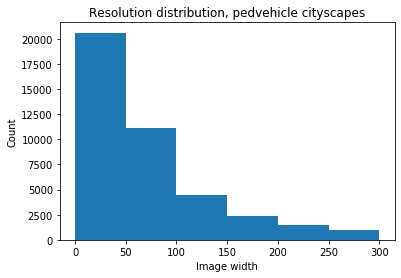

In [21]:
plt.hist(d["x1"]-d["x0"], bins=[0,50,100,150,200,250,300])
plt.xlabel('Image width')
plt.ylabel('Count')
plt.title("Resolution distribution, pedvehicle cityscapes")